## Analysis of RNA Seq data 

The discovery and collection of genetic data along with the growth of scientific computing and the popularisation allows for individuals to perform interesting work and share results, source code, methodologies and figures.

Following below I have attempted to perfoem a reproducable analysis on [RNA Seq][] data of [Pancreatic Adenocarcinoma (PAAD)][1]

[1]:https://en.wikipedia.org/wiki/Pancreatic_cancer
[RNA Seq]:https://bitesizebio.com/13542/what-everyone-should-know-about-rna-seq/

## Exploratory Analysis
### Preprocessing, Cleanining and Setting up an Environemnt 

Import essential libraries

In [1]:
import os

import numpy as np
import pandas as pd

Now we shall assign some global definitions that we will use throught this analysis

In [2]:
# downloaded data files are in the data folder
os.environ['WORKDIR'] = 'data'

# toggle and view the contents of data folder
!ls -lh $WORKDIR
!cd

total 46432
-rwxr-xr-x@ 1 vanisingh  staff    23M Jan  2 23:35 PAAD.gct
-rwxr-xr-x@ 1 vanisingh  staff   6.7K Jan 24 01:36 type1_IFN.docx
-rwxr-xr-x@ 1 vanisingh  staff   142B Nov 26  2018 type1_IFN.txt


In [3]:
#import library to read gct file
from cmapPy.pandasGEXpress.parse import parse

IFN = pd.read_csv(os.environ['WORKDIR']+'/type1_IFN.txt', header = None)

PAAD_gct = parse(os.environ['WORKDIR']+'/PAAD.gct')

# shape of dataframe
print(PAAD_gct.data_df.shape)

# print header
display(PAAD_gct.data_df[:5])

# print attributes of the GCTtoo class
#dir(PAAD_gct)

(18465, 183)


cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


## Understanding the contents of the Data Frame

The GCT file format is a tab-delimited text-based format, pairing matrix expression values with row and column metadata, allowing comparison of both transcriptional and contextual differences across samples.
hence the 
    - rid (row ids) are genes
    - cid (column ids) are the expression data (in this case relating to tumor)
_note_ : both rid's and cid's are unique for a gct format hence, theres not need to recheck them.
        and row and column metadata is parsed and stored by the GCXpress parser.
        
Now to get an indea of the missingness of the data, i.e to see if theres genes with NaN values throghout:

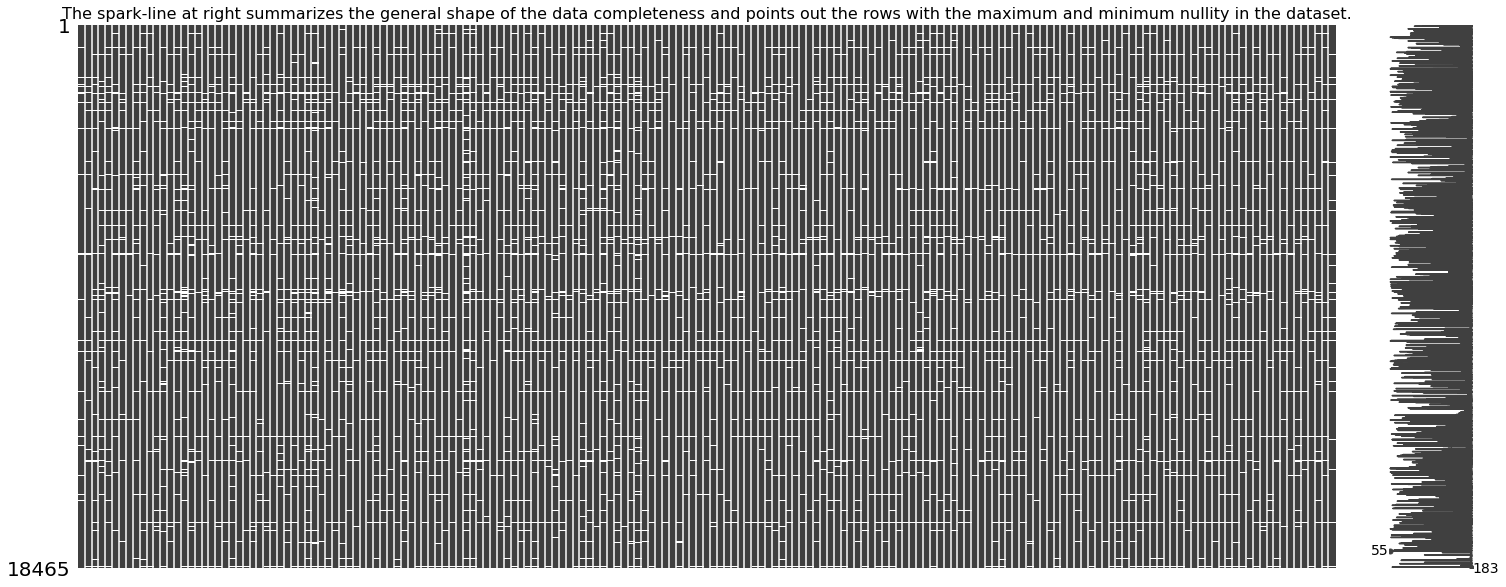

In [4]:
import missingno as msno

#define some general parameters to display with graphs
title_dict={
            'fontsize': 16,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'
            }

plot = msno.matrix(PAAD_gct.data_df).set_title(
    'The spark-line at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.',
    fontdict=title_dict,
    )

In [5]:
# Now that we have a general overview lets filter out non-expressed genes 
expr_df = PAAD_gct.data_df.loc[PAAD_gct.data_df.sum(axis=1) > 0, :]
print(expr_df.shape)

(17984, 183)


In [6]:
'''
Since we observe a difference between this and the original shape of the dataframe let's see which genes are 
NOT expressed
'''

print('Genes that have low expressions :')
non_expr_df = PAAD_gct.data_df.loc[PAAD_gct.data_df.sum(axis=1) <= 0, :]
display(non_expr_df.index.to_list())

Genes that have low expressions :


['ACER1',
 'ACSBG2',
 'ADAM21P1',
 'AHSP',
 'AIPL1',
 'AKAP14',
 'AKAP4',
 'AKR1D1',
 'AMAC1L3',
 'ARID3C',
 'ARL13A',
 'ARL5C',
 'ARMS2',
 'ARSF',
 'ART1',
 'ASCL4',
 'ASFMR1',
 'ATP4B',
 'ATP5L2',
 'AWAT2',
 'BET3L',
 'BPIL2',
 'BRD7P3',
 'BRDT',
 'C10orf129',
 'C10orf131',
 'C10orf27',
 'C10orf50',
 'C11orf34',
 'C12orf54',
 'C12orf71',
 'C12orf77',
 'C13orf35',
 'C13orf39',
 'C14orf162',
 'C14orf166B',
 'C14orf178',
 'C14orf39',
 'C15orf53',
 'C15orf5',
 'C16orf73',
 'C16orf82',
 'C17orf102',
 'C17orf64',
 'C17orf88',
 'C17orf98',
 'C19orf34',
 'C1QL2',
 'C1orf105',
 'C1orf129',
 'C1orf180',
 'C1orf227',
 'C1orf64',
 'C1orf87',
 'C20orf123',
 'C20orf141',
 'C20orf144',
 'C21orf121',
 'C2orf80',
 'C3orf20',
 'C3orf24',
 'C3orf43',
 'C3orf48',
 'C3orf49',
 'C3orf50',
 'C3orf65',
 'C4orf50',
 'C5orf47',
 'C5orf52',
 'C6orf103',
 'C6orf195',
 'C6orf25',
 'C7orf16',
 'C7orf34',
 'C7orf65',
 'C7orf69',
 'C7orf71',
 'C8orf56',
 'C8orf74',
 'C9orf144B',
 'C9orf153',
 'C9orf57',
 'C9orf71',

In [7]:
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print(expr_df.shape)

# Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print(expr_df.shape)

(17984, 183)
(17984, 183)


# If instead all genes with any NaN values have been removed

0        LRRC18
1        MS4A15
2         DCDC2
3        STOML3
4         KCNQ2
         ...   
4362    PCDHAC1
4363      HTR3C
4364      GPR77
4365     ANGPT4
4366       ABRA
Length: 4367, dtype: object

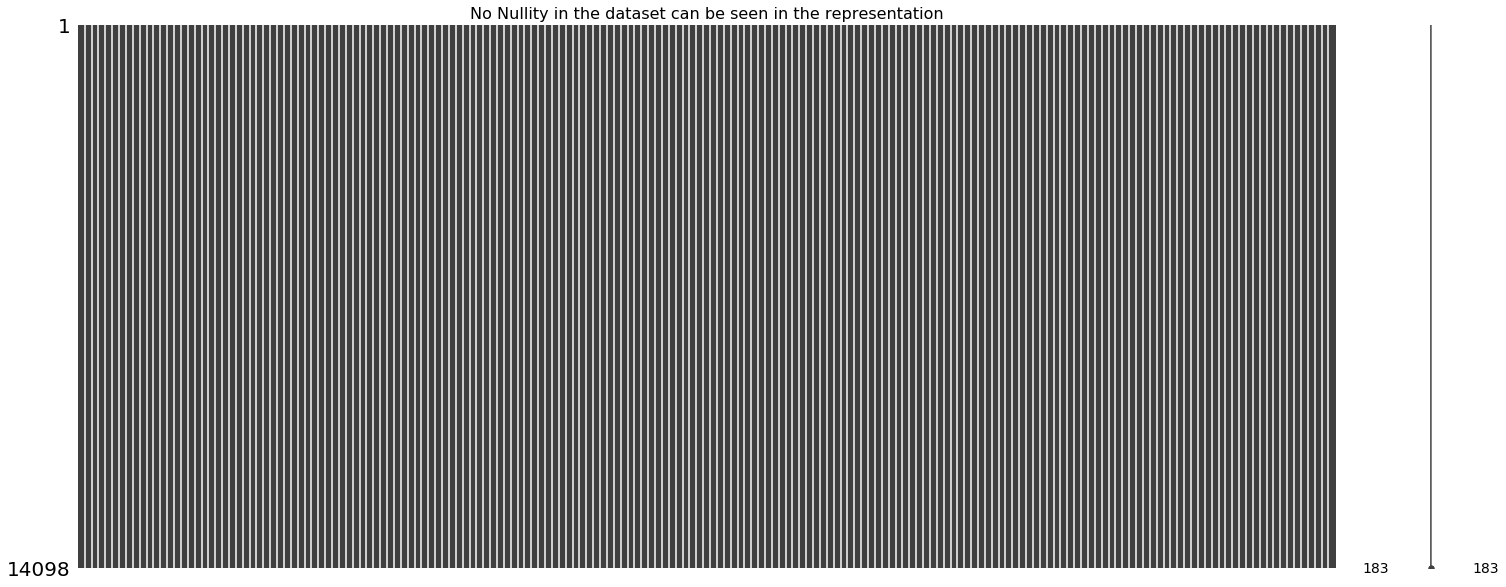

In [8]:
NoNullvalues_df = PAAD_gct.data_df.dropna()

msno.matrix(NoNullvalues_df).set_title(
    'No Nullity in the dataset can be seen in the representation',
    fontdict=title_dict,
    )

#Listing the genes that have been dropped
dropped_genes = set(PAAD_gct.data_df.index.to_list()) - set(NoNullvalues_df.index.to_list())
dropped_genes = pd.Series(list(dropped_genes))
display(dropped_genes)

## Noramlise and Plot a Inital Relationship between genes and Epression Data

Lets normalise the values along the gene expression, rowise (genewise) and plot. 

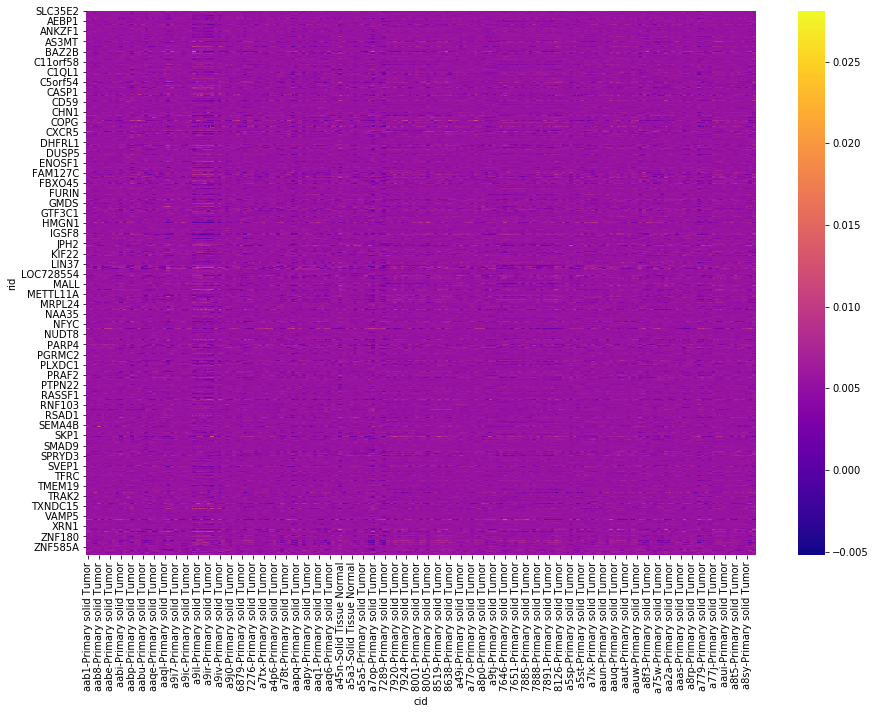

In [9]:
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.pyplot.subplots(figsize=(15,10)) 

sns.heatmap(NoNullvalues_df.div(NoNullvalues_df.sum(axis=1), axis=0), cmap='plasma')

Since it is too difficlut to infer anything from this graph let's try a different approach. Let's first cluster similar genes together and then make the same plot. Post that let's label it with the samples metadata we have interest in. We can use a [k-means clustering approach for gene expression data][1].

[1]: http://users.umiacs.umd.edu/~hcorrada/CMSC423/lectures/CMSC423_Clustering.pdf

In [10]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=10, precompute_distances="auto", n_jobs=-1)

NoNullvalues_df_copy = NoNullvalues_df

NoNullvalues_df_copy['clusters'] = clustering_kmeans.fit_predict(NoNullvalues_df_copy)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


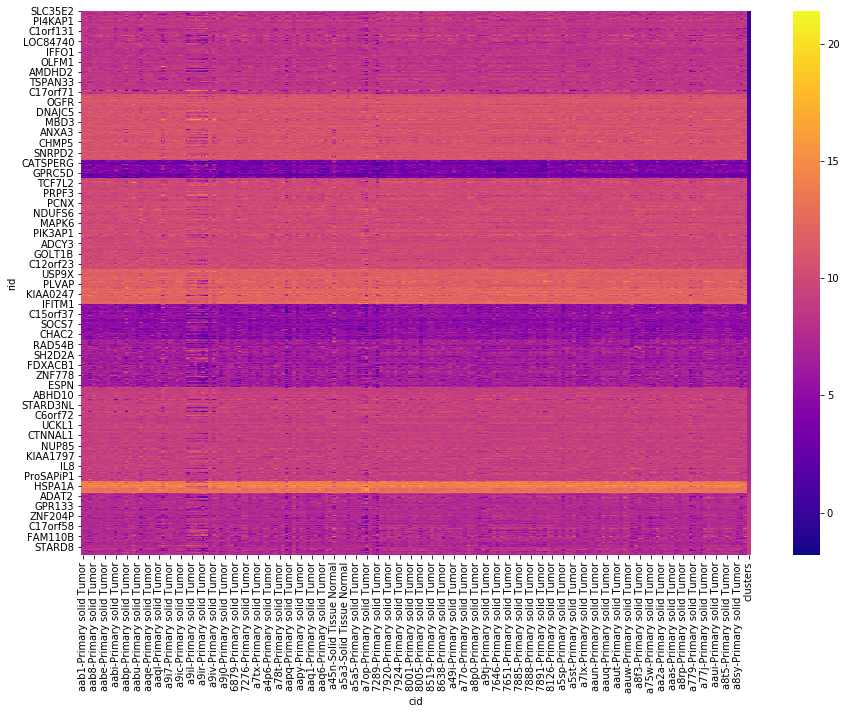

In [11]:
matplotlib.pyplot.subplots(figsize=(15,10)) 

NoNullvalues_df_copy.sort_values(axis =0,by='clusters')
sns.heatmap(NoNullvalues_df_copy.sort_values(axis =0,by='clusters'), cmap='plasma')

Clustering helps us see more clearly the expression of genes 

## to-do :Let's make something called a volcano plot

In a volcano plot we take p-value and fold change for each gene.
    - p-value:
    - fold change:
    

## Identifying Exocrine and Neuroendocrine Cancers 

Using principal component analysis plots.





First let's take a look at the available metadat that should help us make some choices.


In [12]:
display(PAAD_gct.col_metadata_df.columns.to_list())

['participant_id',
 'sample_type',
 'mRNAseq_cluster',
 'bcr_patient_barcode',
 'bcr_patient_uuid',
 'vital_status',
 'days_to_death',
 'days_to_last_followup',
 'additional_studies',
 'adenocarcinoma_invasion',
 'age_at_initial_pathologic_diagnosis',
 'alcohol_history_documented',
 'alcoholic_exposure_category',
 'amount_of_alcohol_consumption_per_day',
 'anatomic_neoplasm_subdivision',
 'anatomic_neoplasm_subdivision_other',
 'b_symptoms',
 'bcr',
 'bcr_aliquot_uuid',
 'bcr_canonical_reason-2',
 'bcr_canonical_reason-3',
 'bcr_canonical_reason',
 'bcr_followup_barcode',
 'bcr_followup_uuid',
 'bcr_patient_canonical_status',
 'clinical_m',
 'clinical_n',
 'clinical_stage',
 'clinical_t',
 'course_number',
 'day_of_dcc_upload',
 'day_of_form_completion',
 'days_to_birth',
 'days_to_diabetes_onset',
 'days_to_index',
 'days_to_initial_pathologic_diagnosis',
 'days_to_pancreatitis_onset',
 'days_to_psa',
 'disease_code',
 'drugs',
 'ethnicity',
 'extranodal_involvement',
 'family_history

In [13]:
#here we observe a few columns of interest we could group our data on in the PCA plot

#Since we want to separtae the Adenocarcinoma from Neuroendocrine lets look at columns clearly mentioning those
PAAD_gct.col_metadata_df['histological_type_other'] = PAAD_gct.col_metadata_df['histological_type_other'].replace(np.nan,'Not Present')
print(PAAD_gct.col_metadata_df['histological_type_other'])

cid
aab1-Primary solid Tumor          invasive adenocarcinoma
aab4-Primary solid Tumor    invasive, well-differentiated
aab6-Primary solid Tumor                      Not Present
aab8-Primary solid Tumor                      Not Present
aab9-Primary solid Tumor                      Not Present
                                        ...              
a89d-Solid Tissue Normal                      Not Present
a89d-Primary solid Tumor                      Not Present
a8sy-Primary solid Tumor                      Not Present
a8lh-Primary solid Tumor                      Not Present
aapl-Primary solid Tumor                      Not Present
Name: histological_type_other, Length: 183, dtype: object


Since the sample is too large to perform a PCA without any preprecessing, let's further removed linked samplesi.e genes (if any) and also take a random sample for the same

In [14]:
from sklearn.decomposition import PCA as PCA
from sklearn.preprocessing import StandardScaler
import random

#each column corresponds to a different sample 
expr_df = StandardScaler(expr_df)

#Lets use the data table with no null values
expr_df = NoNullvalues_df

randomseed = random.randint(0,100)
pca_full = PCA(n_components = 5 ,random_state = randomseed).fit(expr_df.T)

principalComponents = pca_full.fit_transform(expr_df.T)

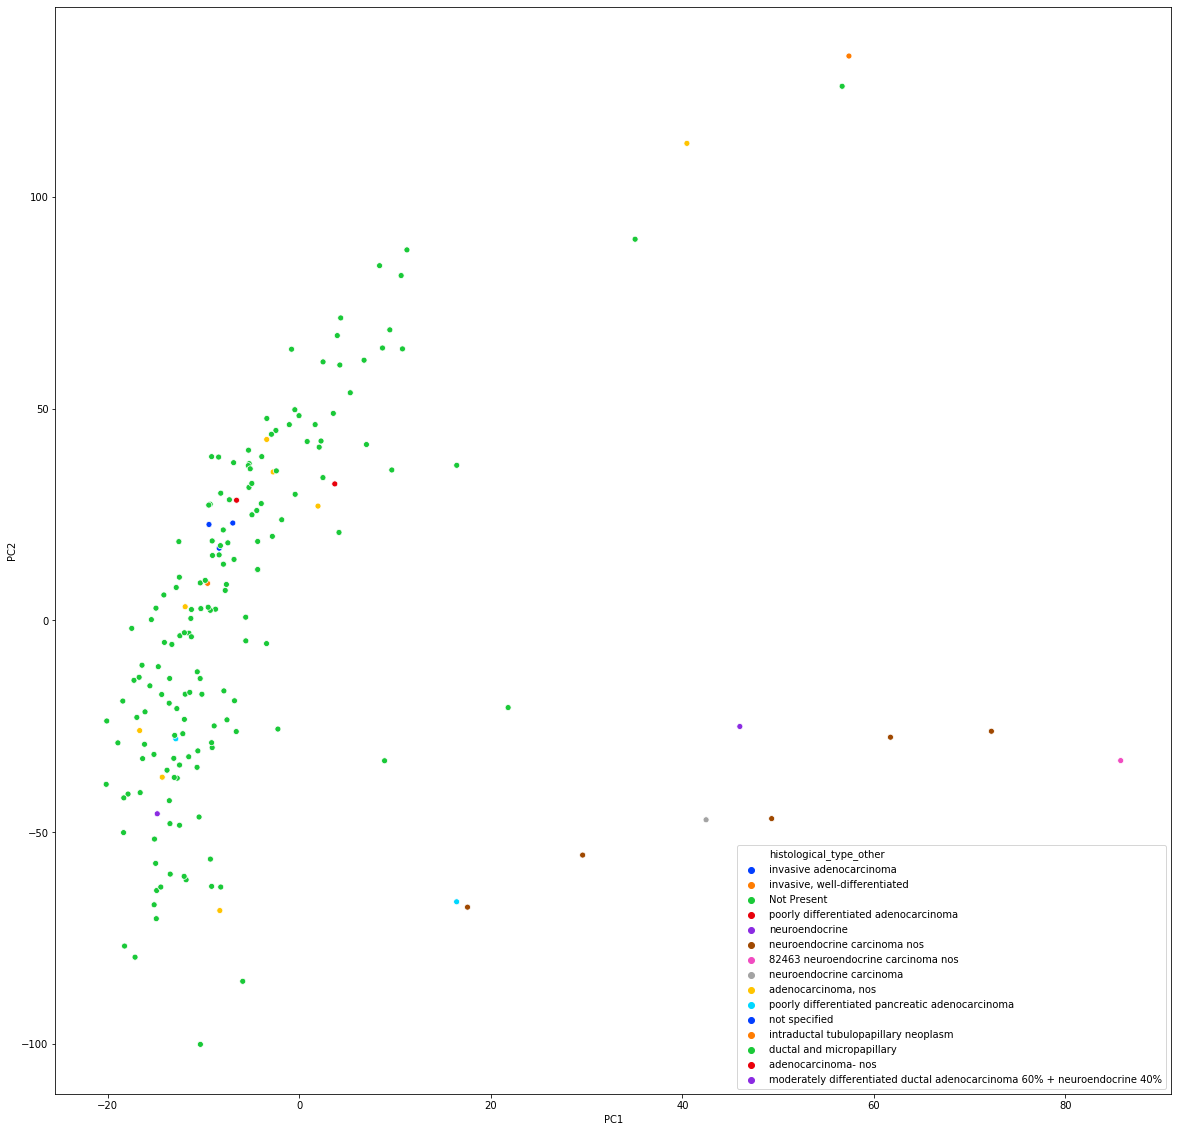

In [15]:
import matplotlib.pyplot as plt


pca_toplot = pd.DataFrame(principalComponents,index=expr_df.T.index).reset_index()
pca_toplot = pca_toplot.merge(PAAD_gct.col_metadata_df['histological_type_other'],on='cid')
pca_toplot.rename(columns={'index':'Sample ID',0:"PC1",1:"PC2",2:"PC3",3:"PC4",4:"PC5"},inplace=True)

plt.gcf().set_size_inches(20, 20)
cmap = sns.color_palette("bright",n_colors=len(list(set(PAAD_gct.col_metadata_df['histological_type_other']))))

sns.scatterplot(pca_toplot["PC1"],pca_toplot["PC2"],hue =pca_toplot['histological_type_other'],palette=cmap)

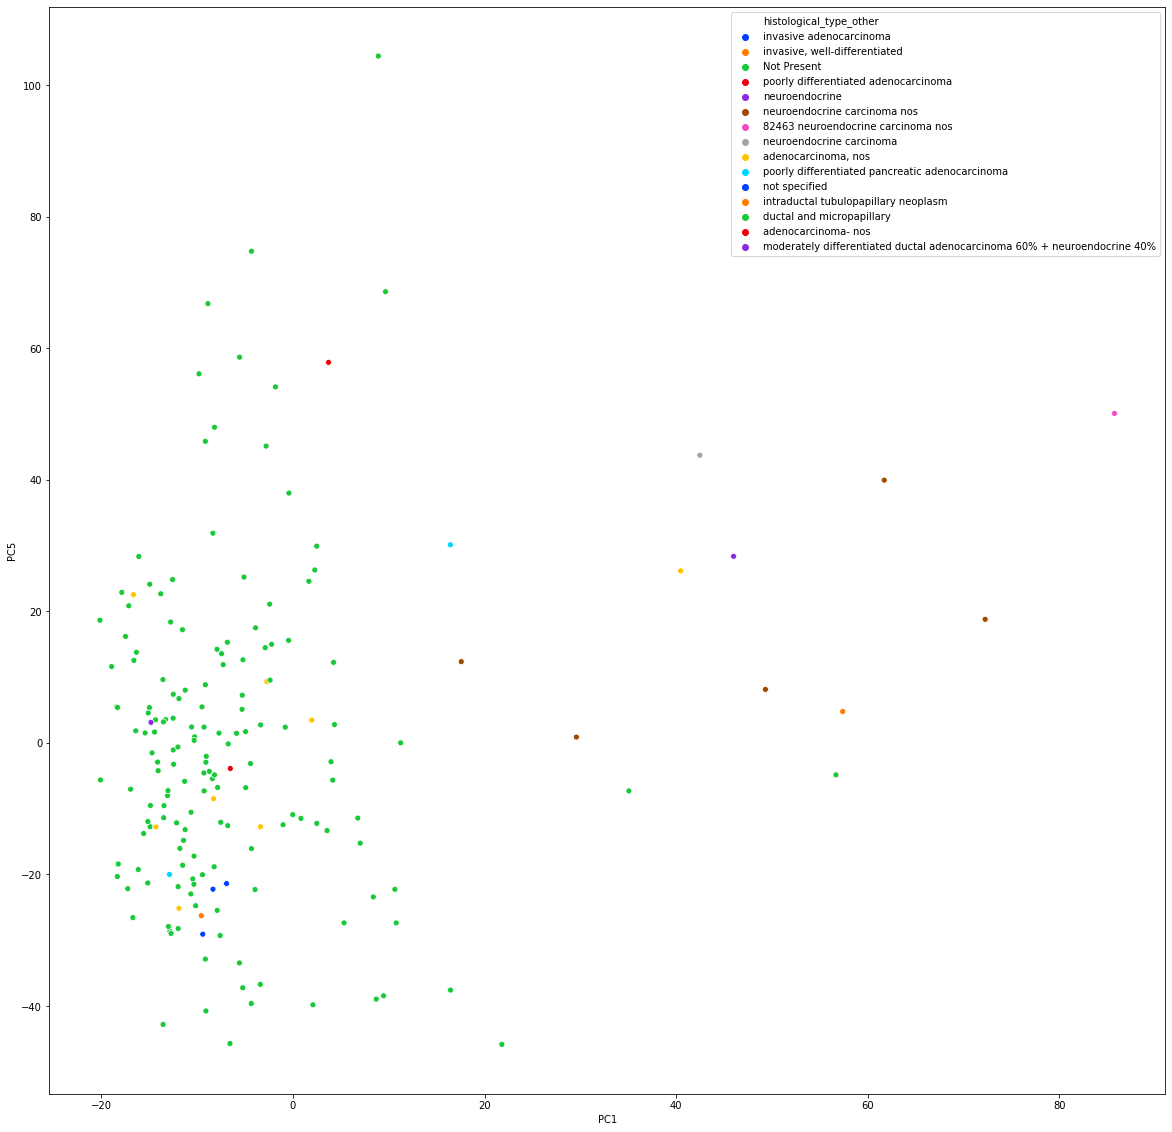

In [16]:
#specify palette
plt.gcf().set_size_inches(20, 20)
sns.scatterplot(pca_toplot["PC1"],pca_toplot["PC5"],hue =pca_toplot["histological_type_other"],palette=cmap)

We can make a few interesting observations from the first PCA:
        - Neuroendocrine carcomas can be spotted separately in the bottom right corner of the 
          graph
        - The 'Not presents' lie in the left half of the graph scattered about the centre
        - The adenocarcinoma and Neuroendocrine carcomas can be seen clearly separately
          as seperate datapoints in the top half and bottom half respectively 

Seeing these results I infer that if i group all the adenocarcinoma readings together I may be able to see more clearly.

In [17]:
display(pca_toplot[pca_toplot['histological_type_other'].str.contains('adenocarcinoma')])
display(pca_toplot[pca_toplot['histological_type_other'].str.contains('neuroendocrine')])

,cid,PC1,PC2,PC3,PC4,PC5,histological_type_other
0,aab1-Primary solid Tumor,-9.423503,22.638757,-8.506915,-0.957618,-29.090165,invasive adenocarcinoma
8,aabh-Primary solid Tumor,-6.938438,22.978551,3.960985,5.819521,-21.397782,invasive adenocarcinoma
9,aabi-Primary solid Tumor,3.711481,32.218094,-5.353021,-31.659227,57.855625,poorly differentiated adenocarcinoma
42,6879-Primary solid Tumor,-2.723653,35.040569,-26.994764,50.131474,9.335554,"adenocarcinoma, nos"
69,a45n-Solid Tissue Normal,16.433672,-66.450698,12.198586,-36.590046,30.120276,poorly differentiated pancreatic adenocarcinoma
70,a45n-Primary solid Tumor,-12.891595,-27.962598,-0.088946,-12.733855,-20.004587,poorly differentiated pancreatic adenocarcinoma
81,7289-Primary solid Tumor,40.479134,112.626580,27.177577,78.401251,26.156281,"adenocarcinoma, nos"
96,8519-Primary solid Tumor,-8.291903,-68.519560,29.348181,13.799591,-8.492803,"adenocarcinoma, nos"
104,a4bk-Primary solid Tumor,-11.910234,3.220068,-9.440439,-8.578726,-25.156242,"adenocarcinoma, nos"
106,a77p-Primary solid Tumor,-14.304024,-37.034319,3.445834,-6.975058,-12.776729,"adenocarcinoma, nos"


,cid,PC1,PC2,PC3,PC4,PC5,histological_type_other
22,aaqm-Primary solid Tumor,46.005729,-25.060330,143.627226,-12.115762,28.364268,neuroendocrine
29,a9ij-Primary solid Tumor,61.734011,-27.591392,168.375687,-31.541357,39.943354,neuroendocrine carcinoma nos
30,a9il-Primary solid Tumor,29.590334,-55.423469,126.388582,-7.263978,0.882538,neuroendocrine carcinoma nos
31,a9in-Primary solid Tumor,17.570676,-67.720797,111.931681,-26.450360,12.347356,neuroendocrine carcinoma nos
32,a9io-Primary solid Tumor,49.327098,-46.813391,150.952879,32.701330,8.130536,neuroendocrine carcinoma nos
33,a9ir-Primary solid Tumor,72.272530,-26.182467,165.535782,28.037694,18.788213,neuroendocrine carcinoma nos
34,a9is-Primary solid Tumor,85.772477,-33.109762,193.487120,74.097102,50.090873,82463 neuroendocrine carcinoma nos
36,a9iv-Primary solid Tumor,42.480619,-47.086816,123.106994,47.835890,43.745828,neuroendocrine carcinoma
177,a8t5-Primary solid Tumor,-14.825404,-45.668740,-2.770270,-27.069750,3.121414,moderately differentiated ductal adenocarcinom...


In [18]:
#so now i can see that we can safely replace this with adenocarcinoma and neuroendocrine and others easily 
#plot the PCA simply

pca_toplot.loc[pca_toplot['histological_type_other'].str.contains('adenocarcinoma'), 'histological_type_other'] = 'adenocarcinoma'
pca_toplot.loc[pca_toplot['histological_type_other'].str.contains('neuroendocrine'), 'histological_type_other'] = 'neuroendocrine'
pca_toplot.histological_type_other = pca_toplot.histological_type_other.apply(lambda x: 'other' if x not in ['neuroendocrine','adenocarcinoma'] else x)


                          cid        PC1        PC2        PC3        PC4  \
0    aab1-Primary solid Tumor  -9.423503  22.638757  -8.506915  -0.957618   
1    aab4-Primary solid Tumor  -9.571015   8.737543  -2.729936  -0.326625   
2    aab6-Primary solid Tumor  -1.829422  23.752931  -9.014528  -9.823236   
3    aab8-Primary solid Tumor  -7.454538  18.302483 -22.553189   1.624425   
4    aab9-Primary solid Tumor -10.648219 -12.150048  -2.995772 -12.742127   
..                        ...        ...        ...        ...        ...   
178  a89d-Solid Tissue Normal -18.935393 -28.926156 -26.313498 -34.140075   
179  a89d-Primary solid Tumor -14.717321 -10.937929 -13.381651  -5.439763   
180  a8sy-Primary solid Tumor  -8.196855  30.022200 -27.529385 -20.668350   
181  a8lh-Primary solid Tumor   8.386325  83.743376  14.705321   1.747991   
182  aapl-Primary solid Tumor  -2.228382 -25.666525 -18.812116 -26.055285   

           PC5 histological_type_other  
0   -29.090165          adenocarci

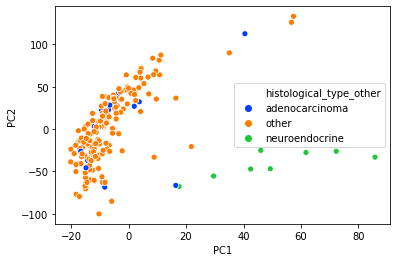

In [19]:
cmap = sns.color_palette("bright",n_colors=len(list(set(pca_toplot['histological_type_other']))))
sns.scatterplot(pca_toplot["PC1"],pca_toplot["PC2"],hue =pca_toplot['histological_type_other'],palette=cmap)
print(pca_toplot)

In [20]:
from sklearn.metrics import explained_variance_score

'''
Variance is the measure of deviation from mean score, or the average, the higher the deviation from the average

Explained variance regression score function.Best possible score is 1.0, lower values are worse.
Hence the closer to 1 the score is the more less scattered the data points will be

We hoped to get two clear groups in this data, which is not the case.

The varience given below can be seen and explained using the graphs above, lets take the example of the PC1 vs PC2
graph which is a high variance and the PC1 vs PC5 graph with the lowest 
'''
print('variance between principal components:','\n'
,explained_variance_score(pca_toplot['PC1'],pca_toplot['PC2'])
,explained_variance_score(pca_toplot['PC1'],pca_toplot['PC3'])
,explained_variance_score(pca_toplot['PC1'],pca_toplot['PC4'])
,explained_variance_score(pca_toplot['PC1'],pca_toplot['PC5'])
,explained_variance_score(pca_toplot['PC1'],pca_toplot['PC1'])
)

variance between principal components: 
 -4.757097169310655 -1.1963148051827113 -2.352271841905027 -1.5720392438370299 1.0


Cleaning up the dataframe based on the metadata and retaining only those cid's with adenocarcinoma tumor samples.



In [21]:
#merge with histological_type_other column
NoNullvalues_df = NoNullvalues_df.T 
NoNullvalues_df = NoNullvalues_df.merge(PAAD_gct.col_metadata_df['histological_type_other'],on='cid')

In [22]:
# remove all those values whose regex does't match with 'adenocarcinoma'
adenocarcinoma_tumor_samples = NoNullvalues_df.loc[NoNullvalues_df['histological_type_other'].str.contains(r'adenocarcinoma')]
display(adenocarcinoma_tumor_samples)

,SLC35E2,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,histological_type_other
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,7.45,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,...,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3,invasive adenocarcinoma
aabh-Primary solid Tumor,7.55,5.7,8.0,13.9,8.4,9.0,9.7,5.4,9.7,9.7,...,7.3,8.6,6.4,9.4,9.8,8.9,12.7,10.0,8.8,invasive adenocarcinoma
aabi-Primary solid Tumor,8.45,6.3,5.8,11.9,7.9,9.3,9.1,4.1,9.8,10.5,...,8.4,9.2,5.6,9.0,10.7,8.3,12.5,9.9,8.6,poorly differentiated adenocarcinoma
6879-Primary solid Tumor,7.85,4.5,6.3,12.9,7.3,9.3,10.2,5.3,9.5,10.0,...,7.9,9.2,5.9,9.9,9.7,9.6,11.8,10.1,9.7,"adenocarcinoma, nos"
a45n-Solid Tissue Normal,9.00,7.2,6.8,13.6,8.7,10.0,8.2,4.9,9.7,10.1,...,8.2,8.4,6.7,9.3,10.8,9.4,11.9,11.8,9.6,poorly differentiated pancreatic adenocarcinoma
a45n-Primary solid Tumor,7.80,7.1,6.4,14.5,9.0,9.6,10.1,6.4,9.6,9.8,...,7.8,8.0,5.9,8.8,10.1,9.4,12.3,10.9,9.2,poorly differentiated pancreatic adenocarcinoma
7289-Primary solid Tumor,8.00,5.2,6.3,10.1,10.0,10.0,11.2,1.4,11.0,8.8,...,9.1,8.3,5.9,8.8,9.9,8.4,12.3,10.9,9.1,"adenocarcinoma, nos"
8519-Primary solid Tumor,7.95,7.9,7.7,14.7,8.4,8.9,9.7,6.6,10.1,10.4,...,7.9,7.6,6.5,8.8,10.3,9.8,11.5,10.8,9.9,"adenocarcinoma, nos"
a4bk-Primary solid Tumor,8.25,6.7,6.0,14.0,9.5,9.8,9.8,5.7,9.6,9.8,...,7.9,8.5,6.0,8.8,10.1,9.5,12.6,10.3,9.2,"adenocarcinoma, nos"


## Understanding Inferons

We have imported the names of the IFN Genes into the 'IFN' dataframe from the data folder, now let's plot their gene expressions for the samples selected

In [23]:
!pip3 install GSVA

Text(32.99999999999999, 0.5, 'sample')

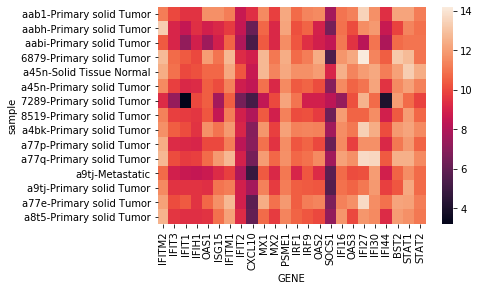

In [24]:
#Plotting a simple graph of the gene expression of the adenocarcinoma tumor samples ( let's try a heatmap)

#let's first remove those genes that had nan values which we removed 
IFN = list(set(IFN[0].to_list()) - set(dropped_genes.to_list()))

plt = sns.heatmap(data=adenocarcinoma_tumor_samples[IFN])
plt.set_xlabel('GENE')
plt.set_ylabel('sample')

We can make some interesting observations about the expressions of SOCS1, CXCL10 genes being expressed more pronounced as well as the IFIT1 AND IDI44 being significantly overexpressed in 7289 sample.

#todo : change labels to histological_type_other

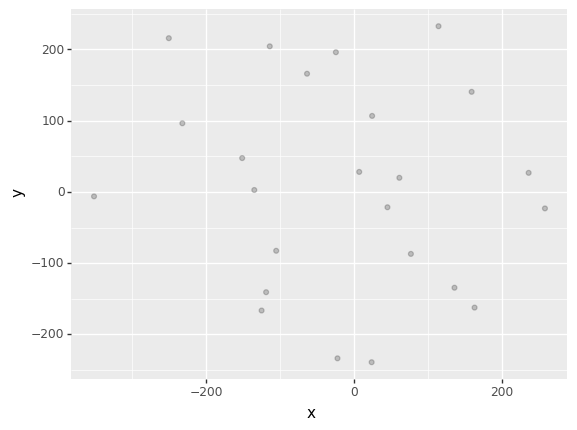

<ggplot: (-9223372036531160660)>

In [32]:
from GSVA import gsva, gmt_to_dataframe

# Some extras to look at the high dimensional data
from plotnine import *
from sklearn.manifold import TSNE


XV = TSNE(n_components=3).\
    fit_transform(adenocarcinoma_tumor_samples[IFN].T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)


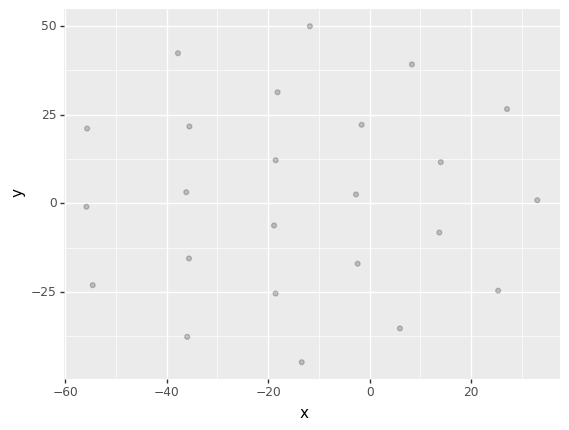

<ggplot: (-9223372036531200540)>

In [34]:
YV = TSNE(n_components=2).\
    fit_transform(adenocarcinoma_tumor_samples[IFN].T)
pf = pd.DataFrame(YV).rename(columns={0:'x',1:'y'})
(ggplot(pf,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)